---
# <div align="center">**HỆ THỐNG A.I ĐÁNH GIÁ KPI NHÂN VIÊN NGÂN HÀNG**</div>  
---  
### **A. MỤC TIÊU DỰ ÁN**
- **Tự động hóa & tối ưu hóa đánh giá KPI**: Phân tích dữ liệu hiệu suất - Đánh giá minh bạch, công bằng
- **Hỗ trợ quản lý nhân sự**: Giảm tải công việc cho quản lý: Báo cáo chi tiết - Gợi ý cải thiện
- **Phát hiện & khuyến nghị**: Xác định khen thưởng - Đề xuất đào tạo
  
### **B. DỮ LIỆU ĐẦU VÀO**
- **<ins>Nhân sự (Dự án hiện tại)<ins>**
    - Đinh danh: ID, Tên, Năm sinh, Giới tính
    - Công việc: Chi nhánh, Chức vụ, Thu nhập 
- **<ins>Hiệu suất nhân viên (Dự án hiện tại)<ins>**
    - Doanh số: Book, Net, SL Khách hàng  
    - Điểm KPI: Chưa chặn/Đã chặn, Cá nhân/Bộ phận, Kế hoạch/Thực tế, Tỷ trọng theo chức vụ
- **Phản hồi & hành vi**  
    - Đánh giá: Phản hồi từ khách hàng, Phản hồi 360 từ đồng nghiệp  
    - Log công việc: Thời gian xử lý công việc, tỷ lệ lỗi  
- **Yếu tố bên ngoài**  
    - Mùa vụ kinh doanh
    - Tình hình kinh tế vĩ mô, tin tức tài chính
      
### **C. CƠ SỞ HẠ TẦNG & GIAO DIỆN NGƯỜI DÙNG UI/UX & TÍCH HỢP TỰ ĐỘNG HÓA**
- Phối hợp với các bộ phận khác. Code Python hiện tại chỉ tập trung vào Mô hình: Phương pháp, Thử nghiệm, Đánh giá, Cải thiện

### **D. NỘI DUNG CHÍNH** 
- ##### **THIẾT LẬP DỰ ÁN**
    - Cài đặt thư viện
    - Tải bộ dữ liệu, tạo Header chuẩn
    - Tạo function trực quan hóa
- ##### **TIỀN XỬ LÝ DỮ LIỆU**
    - Loại bỏ các biến không cần thiết
    - Tạo thêm biến quan trọng có ý nghĩa hơn
    - Điền dữ liệu bị thiếu
    - v.v
- ##### **MÔ HÌNH DỰ BÁO % KPI**
    - Chuẩn hóa
    - Chia dữ liệu
    - Huấn luyện mô hình
- ##### **ĐÁNH GIÁ MÔ HÌNH**
    - In kết quả so sánh, trực quan
    - Đánh giá chỉ số
    - Kết luận
- ##### **KẾT LUẬN - NHẬN ĐỊNH**

---
# <div align="center">**0. THIẾT LẬP DỰ ÁN**</div>  
---  

## **0.1: CÀI ĐẶT THƯ VIỆN**
- **NHẬP TẤT CẢ THƯ VIỆN CẦN THIẾT CHO TOÀN BỘ DỰ ÁN**   
    - Nếu lỗi thiếu thư viện, tải thêm thư viện tương ứng 

In [2]:
# !pip install numpy                                  
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install statsmodels
# !pip install scikit-learn
# !pip install xgboost
# !pip install //etc...etc...//

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

---
## **0.2: CÀI ĐẶT TRỰC QUAN HÓA**
- **TRONG QUÁ TRÌNH VIẾT CODE CẦN LIÊN TỤC KIỂM TRA DATAFRAME**
    - Thường sử dụng head(), info(), describe() cần cài đặt để hiển thị đầy đủ
    - Tạo thêm các function để trực quan Bảng và Đồ thị đẹp hơn

In [4]:
pd.set_option('display.max_columns', None)               # Hiển thị đầy đủ bảng với thanh trượt ngang
pd.set_option('display.float_format', '{:,.2f}'.format)  # Làm tròn số hiển thị ở dạng 2 thập phân cho gọn
pd.set_option('future.no_silent_downcasting', True)      # Bỏ qua cảnh báo khi chạy downcasting ở bước TargetEncoder()

# def table()                                            
#     
# def hisplot_before()
#
# def matrix()
#

---
## **0.3: TẢI BỘ DỮ LIỆU GỐC**
- **GIỮ DATAFRAME NGUYÊN BẢN NHẤT ĐỂ THUẬN TIỆN CHO VIỆC CẢI THIỆN MÔ HÌNH - TỰ ĐỘNG HÓA**
    - Sau này thống nhất với bộ phần khác về quy trình tự động hóa nhập xuất dữ liệu bằng SAP - SQL - POWER BI mới được dùng dataframe khác
    - Hiện tại, giữ lại bộ dữ liệu gốc từ File Excel, không được chỉnh sửa gì

In [5]:
# Excel gốc bị trống dòng đầu tiên, lấy dòng 2 và 3 làm header
data_raw = pd.read_excel("D:/FOX AI/Project Info/KPI/KPI 2024.xlsx", header=[1,2])
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   (Unnamed: 0_level_0, Tháng)                           14074 non-null  float64       
 1   (Unnamed: 1_level_0, CIF CBNV)                        14074 non-null  object        
 2   (Unnamed: 2_level_0, Họ - Tên CBNV)                   14074 non-null  object        
 3   (Unnamed: 3_level_0, Mã ĐVKD)                         14074 non-null  int64         
 4   (Unnamed: 4_level_0, Khu vực)                         14074 non-null  object        
 5   (Unnamed: 5_level_0, Tên đơn vị)                      14074 non-null  object        
 6   (Unnamed: 6_level_0, Chức danh)                       14074 non-null  object        
 7   (Unnamed: 7_level_0, Mã chức danh)                    14074 non-null  object

---
## **0.4: TẠO DATAFRAME CHUẨN**
- **ĐỔI HEADER THÀNH 1 DÒNG DUY NHẤT**
    - Cách 1: Dùng vòng lặp để ghép string 2 dòng với nhau >> KHÔNG THÍCH HỢP vì tên biến bị dài và không đúng (chỉ dùng khi cần Tự động hóa)
    - Cách 2: Chỉ có 41 biến >> Tự thay tên thủ công theo ý của coder
    - Lưu trữ lại dataframe chuẩn này, đặt tên là: df_renamed

In [6]:
# Tạo cột mới bao gồm các header muốn thay - dạng list (Đối chiếu với file excel cho dễ nhìn)
new_header = ['Tháng', 'CIF CBNV', 'Họ Tên', 
              'Mã ĐVKD', 'Khu vực', 'Đơn vị', 'Chức danh', 'Mã chức danh',     
              'Ngày vào làm việc', 'Giới tính', 'Năm sinh',                   
              'Book Huy động', 'Book Cho vay', 'Net Huy động', 'Net Cho vay',
              'Điểm Book TỔNG HĐ chưa chặn', 'Điểm Book HĐ KỲ HẠN chưa chặn', 'Điểm Book HĐ CASA chưa chặn', 'Điểm Book CV chưa chặn',
              'Điểm Net HĐ', 'Điểm Net CV', 
              'SL KH',
              'KPI_CN Book Value', 'KPI_CN Net Value', 'KPI_CN Điểm DV', 'KPI_CN CLTD/DV',
              'KPI_BP Book Value', 'KPI_BP Net Value', 'KPI_BP Điểm DV', 'KPI_BP CLTD/DV',
              'Tổng điểm CN', 'Tổng điểm BP', 
              'Điểm KH CN', 'Điểm KH BP', 
              'Tỷ trọng KPI_CN', 'Tỷ trọng KPI_BP',
              'Điểm Cộng/Trừ CN', 
              '% KPI_CN', '% KPI_BP', '% KPI cuối cùng', 
              'Thu nhập Gross'
             ]

# Ghi đè cột Header mới đủ 41 biến thay cho Header 1 và 2 MultiIndex, tạo thành dataframe 
data_raw.columns = new_header

# Đổi tên để lưu trữ
df_renamed = data_raw

# Kiểm tra 
display(df_renamed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Tháng                          14074 non-null  float64       
 1   CIF CBNV                       14074 non-null  object        
 2   Họ Tên                         14074 non-null  object        
 3   Mã ĐVKD                        14074 non-null  int64         
 4   Khu vực                        14074 non-null  object        
 5   Đơn vị                         14074 non-null  object        
 6   Chức danh                      14074 non-null  object        
 7   Mã chức danh                   14074 non-null  object        
 8   Ngày vào làm việc              14074 non-null  datetime64[ns]
 9   Giới tính                      14074 non-null  object        
 10  Năm sinh                       14074 non-null  int64         
 11  Book Huy động  

None

In [7]:
# Kiểm tra 2
display(df_renamed.head(3))

,Tháng,CIF CBNV,Họ Tên,Mã ĐVKD,Khu vực,Đơn vị,Chức danh,Mã chức danh,Ngày vào làm việc,Giới tính,Năm sinh,Book Huy động,Book Cho vay,Net Huy động,Net Cho vay,Điểm Book TỔNG HĐ chưa chặn,Điểm Book HĐ KỲ HẠN chưa chặn,Điểm Book HĐ CASA chưa chặn,Điểm Book CV chưa chặn,Điểm Net HĐ,Điểm Net CV,SL KH,KPI_CN Book Value,KPI_CN Net Value,KPI_CN Điểm DV,KPI_CN CLTD/DV,KPI_BP Book Value,KPI_BP Net Value,KPI_BP Điểm DV,KPI_BP CLTD/DV,Tổng điểm CN,Tổng điểm BP,Điểm KH CN,Điểm KH BP,Tỷ trọng KPI_CN,Tỷ trọng KPI_BP,Điểm Cộng/Trừ CN,% KPI_CN,% KPI_BP,% KPI cuối cùng,Thu nhập Gross
0,"2,024.04",000013897,DANG NGOC XUAN ANH,25,KV6,CN ĐẮK LẮK,Giám đốc Dịch vụ khách hàng,CQL DVKH,2008-06-17,Nữ,1983,"68,382,348,762.00","853,800,000.00","3,127,777,986.33","-385,670,000.00",56.20,55.08,1.12,1.75,2.57,-0.79,20,29.04,0.64,2.93,-5.00,294.96,7.23,16.74,-30.00,27.60,288.93,131.33,413.17,0.60,0.40,NaN,0.21,0.70,0.41,"20,523,350.00"
1,"2,024.04",000254297,NGUYEN THI THI DIEM,22,KV3,CN ĐỒNG THÁP,Giám đốc Dịch vụ khách hàng,CQL DVKH,2010-12-15,Nữ,1988,"68,382,348,762.00","853,800,000.00","3,127,777,986.33","-385,670,000.00",56.20,55.08,1.12,1.75,2.57,-0.79,548,57.95,1.77,7.70,0.00,182.44,1.54,16.12,0.00,67.42,200.11,131.33,589.08,0.60,0.40,NaN,0.51,0.34,0.44,"20,523,350.00"
2,"2,024.04",000660698,PHAN VAN VAN LOI,27,KV8,CN HÀ NỘI,Giám đốc Dịch vụ khách hàng,CQL DVKH,2008-02-01,Nam,1977,"48,507,770,815.00","3,221,763.90","39,407,406,889.80","220,561.35",39.87,39.07,0.80,0.01,31.77,0.00,55,39.88,31.77,2.30,0.00,"1,503.13",147.45,152.33,0.00,73.95,"1,802.91",131.33,690.83,0.60,0.40,NaN,0.56,1.50,0.94,"26,886,939.00"


---
# <div align="center">**1. TIỀN XỬ LÍ DỮ LIỆU**</div>   
---

## **1.0: GHI CHÚ**
- **CẦN TẠO DATAFRAME GỌN TRƯỚC KHI CHUẨN HÓA ĐƯA VÀO MÔ HÌNH**
    - Thuận tiện cho việc Tự động hóa sau này
        - Xóa biến không cần thiết
        - Tạo biến đại diện thay thế cho 1 hay nhiều biến cũ
        - Điền giá trị thiếu
        - Xóa biến quá đại diện thừa thông tin
        - v.v
- **XỬ LÍ DỮ LIỆU TUẦN TỰ: TRÁI -> PHẢI**
    - Dễ theo dõi theo File Excel gốc, tránh bị Quên xóa (Thừa biến) hoặc Xóa nhầm (Mất biến quan trọng)
- **CHÚ THÍCH Ý NGHĨA**
    - Có những Biến độc lập, có những Biến được tạo bởi Tổng/Hiệu/Tích/Thương hoặc Công thức ẩn từ các biến khác
    - Coder chỉ được cung cấp bản Copy Value nên chỉ có thể suy luận một số công thức trong Excel đã bị ẩn đi

In [8]:
# 0. Tháng                          Thời điểm dòng dữ liệu được ghi nhận vào hệ thống 
# 1. CIF CBNV                       Mã ID độc lập cho từng người, dùng để truy vấn nếu cần
# 2. Họ Tên
# 3. Mã ĐVKD             
# 4. Khu vực             
# 5. Đơn vị             
# 6. Chức danh           
# 7. Mã chức danh
# 8. Ngày vào làm việc
# 9. Giới tính
# 10. Năm sinh
# 11. Book Huy Động                 Tổng số tiền huy động được từ khách hàng     (tiền gửi, tiết kiệm, đầu tư)       >> Hiệu suất Thu hút vốn
# 12. Book Cho Vay                  Tổng số tiền đã giải ngân cho khách hàng vay                                     >> Hiệu suất Cho vay
# 13. Net Huy Động Vốn              = Book Huy Động Vốn - Số tiền khách rút ra   (Mức tăng trưởng của HĐV)           >> Hiệu suất thu hút tiền gừi
# 14. Net Cho Vay                   = Book Cho Vay - Số tiền khách trả nợ        (Mức tăng trưởng của Dư nợ cho vay) >> Hiệu suất tín dụng
# 15. Điểm Book Tổng HĐ chưa chặn   = f0(Book HĐ kỳ hạn, HĐ CASA, HĐ khác...)    (Cách tính tùy theo ngân hàng, hàm đã bị ẩn đi
# 16. Điểm Book HĐ kỳ hạn chưa chặn = f1(Book HĐ kỳ hạn)                          Cách tính tương tự, chỉ khác hàm: chia mức chuẩn, nhân hệ số,....) 
# 17. Điểm Book HĐ CASA chưa chặn   = f2(Book HĐ CASA)                                         
# 18. Điểm Book CV chưa chặn        = f3(Book CV)
# 19. Điểm Net HĐ                   = f4(Net HĐ)
# 20. Điểm Net CV                   = f5(Net CV)
# 21. SL KH
# 22. KPI_CN Book Value             = g0(Book HĐ, Book CV)                        Vẫn tương tự, hàm đã bị ẩn đi:
# 23. KPI_CN Net Value              = g1(Net HĐ, Net Value)                                     Thêm chặn, thay trọng số,... 
# 24. KPI_CN Điểm DV                Điểm Dư Vốn /// Điểm Dịch vụ ???????????                                   
# 25. KPI_CN CLTD/DV                Cho Lãi Tín Dụng / DV
# 26. KPI_BP Book Value                                                           Vẫn tương tự, hàm khác nữa bị ẩn đi:
# 27. KPI_BP Net Value                                                                          Chia cho tổng nào đó của bộ phận, thay trọng số,...    
# 28. KPI_BP Điểm DV                
# 29. KPI_BP CLTD/DV                       
# 30. Tổng điểm CN                  = SUM(22 23 24 25)
# 31. Tổng điểm BP                  = SUM(26 27 28 29)      
# 32. Điểm KH CN                    Điểm Kế hoạch Cá nhân
# 33. Điểm KH BP                    Điểm Kế hoạch Bộ phận
# 34. Tỷ trọng KPI_CN                    Tỷ trọng cột 34 35 để nhân với cột 37 38 ra cột 39        
# 35. Tỷ trọng KPI_BP                    Ví dụ: GDV tỷ trọng 1 - 0; Càng cấp cao như GĐ, KSV thì tỷ trọng 0.2 - 0.8 (chính sách ngân hàng tùy tháng)
# 36. Điểm Cộng/Trừ CN              Cộng vào cột 30 ???
# 37. % KPI_CN                      = 30 / 32
# 38. % KPI_BP                      = 31 / 33 
# 39. % KPI cuối cùng               = 30 * 37 + 35 * 38
# 40. Thu nhập Gross                Thu nhập trước khi trừ đi các khoản chi phí, thuế, bảo hiểm, v.v khác

---
## **1.1: ĐỊNH DANH TRUY VẤN**
- **'CIF CBNV' & 'Họ Tên':**
    - Sau này nếu cần truy vấn kiểm tra thì tạo cột bản sao rồi gán index tương ứng cho tập y_pred sau

    > **=> Xóa** *(Cảnh báo: Nếu ở dưới có bước "Xóa dòng" khi làm sạch thì Index sẽ bị lệch, phải đổi thứ tự các bước)*
- **'Khu vực':**
    - Sau này nếu cần trực quan hóa bản đồ thì tạo cột bản sao tương tự

    > **=> Xóa**
- **'Mã ĐVKD' & 'Đơn vị':** 
    - 2 Biến có chung ý nghĩa, do LỖI NHẬP LIỆU:
    - 'Mã ĐVKD': 134 Giá trị thực tế tương ứng 134 Chi nhánh (Xem FILTER Excel)
    - 'Đơn vị': 270 Giá trị bao gồm
        - 268 (= 134 Chi nhánh x 2) do lỗi nhập liệu: "CN ĐÀ NẴNG" và "CN Đà Nẵng" cùng là 1 Chi nhánh với cùng 1 Mã ĐVKD "019"
        - 2 giá trị lẻ cũng lỗi nhập liệu: "CHI NHÁNH ĐÀ NẴNG" tương tự (còn 1 giá trị lẻ chưa tìm được)

    > **=> Xóa 'Đơn vị', giữ lại 'Mã ĐVKD' đủ đại diện**
- **'Mã chức danh' & 'Chức danh'**
    - 2 Biến có chung ý nghĩa, nhưng không phải do lỗi:
    - 'Mã chức danh': 6 Giá trị
    - 'Chức danh': 41 Giá trị chi tiết hơn 
        - Ví dụ: cùng là GDV nhưng bao gồm "Giao dịch viên", "Giao dịch viên chính", "Giao dịch viên kiêm Chuyên viên tư vấn"

    > **=> Xóa 'Chức danh' tránh lỗi nhập liệu của 41 giá trị string rất dài, giữ lại 'Mã chức danh' đủ đại diện**

In [9]:
# Tạo bản sao dataframe gọn, tránh ghi đè
df = df_renamed.copy()

# Xóa
df.drop(columns=['CIF CBNV', 'Họ Tên'], inplace=True)
df.drop(columns=['Khu vực'], inplace=True)

# Xem số Biến độc lập kết hợp với FILTER Excel
unique_counts = df_renamed[['Mã ĐVKD', 'Khu vực', 'Đơn vị', 'Chức danh', 'Mã chức danh']].nunique()
display(unique_counts)

# Xóa
df.drop(columns=['Đơn vị', 'Chức danh'], inplace=True)

Mã ĐVKD         134
Khu vực           8
Đơn vị          270
Chức danh        41
Mã chức danh      6
dtype: int64

---
## **1.2: KINH NGHIỆM LÀM VIỆC**
- **'Tháng' & 'Ngày vào làm việc'**
    - 'Tháng': đang ở dạng float64: 2024.04 tức là năm 2024 tháng 4
    - 'Ngày vào làm việc': đang ở dạng datetime64 chuẩn: 06/17/2008

    > **=> Tạo biến mới 'Số năm đã làm' thay thế 2 biến cũ**
    - Trong quá trình code phát hiện ra ở một số ít quan sát như #970: 'Ngày vào làm việc' dạng mm/dd/yyyy: 04/08/2024 nhập sai thành 08/04/2024
    - Trong khi đó 'Tháng' ghi nhận là Tháng 4/2024 khiến cho 'Số năm đã làm' có giá trị âm như -0.2, -0.25,... với min là -0.33333
    - May thay, không tồn tại các trường hợp nhập liệu mm/dd = 14/2, 31/10, 25/12 vì Excel sẽ báo lỗi trước => Chỉ tồn tại những trường hợp vào làm vào các ngày 1-12 tháng bất kì => Sai số lớn nhất cũng chỉ 12-4=8 tháng

    > **=> Những người làm việc năm 2024 bị nhập liệu sai ngày tháng: thay = 0 không ảnh hưởng nhiều**
- **'Năm sinh'**
    - Không có quá nhiều ý nghĩa, chỉ có 'Tuổi' thì mới có tương quan một chút với 'Số năm đã làm' hay 'Chức danh'

    > **=> Tạo biến mới 'Tuổi' thay thế**

In [10]:
# Tách năm và tháng từ các biến cũ
year_recorded = df['Tháng'].astype(int)
month_recorded = ((df['Tháng'] - year_recorded) * 100).round().astype(int)
year_joined = df['Ngày vào làm việc'].dt.year
month_joined = df['Ngày vào làm việc'].dt.month

# Tính 'Số năm đã làm', với phần thập phân biểu thị số tháng
years_worked = (year_recorded - year_joined) + (month_recorded - month_joined) / 12

# Thêm vào dataframe ở đúng vị trí index mong muốn
df.insert(3, 'Số năm đã làm', years_worked)

# Những trường hợp <0 coi như = 0
df['Số năm đã làm'] = df['Số năm đã làm'].apply(lambda x: max(x, 0))

# Kiểm tra
display(df[['Tháng', 'Ngày vào làm việc', 'Số năm đã làm']].head())

# Xóa các biến cũ
df.drop(columns=['Tháng', 'Ngày vào làm việc'], inplace=True)

,Tháng,Ngày vào làm việc,Số năm đã làm
0,"2,024.04",2008-06-17,15.83
1,"2,024.04",2010-12-15,13.33
2,"2,024.04",2008-02-01,16.17
3,"2,024.04",2010-08-11,13.67
4,"2,024.04",2008-09-04,15.58


In [11]:
# Trong quá trình làm, phát hiện duy nhất 2 quan sát bị sai năm sinh 2002 thành 2022 khiến Tuổi = 3
df.loc[df['Năm sinh'] == 2022, 'Năm sinh'] = 2002  # Sửa lỗi nhập liệu

# Tính 'Tuổi'
age = 2025 - df['Năm sinh']

# Thêm vào dataframe ở đúng vị trí index mong muốn
df.insert(4, 'Tuổi', age)

# Kiểm tra
display(df[['Năm sinh', 'Tuổi']].head())

# Xóa cột 'Năm sinh' sau khi đã tính tuổi
df.drop(columns=['Năm sinh'], inplace=True)

,Năm sinh,Tuổi
0,1983,42
1,1988,37
2,1977,48
3,1986,39
4,1982,43


---
## **1.3: ĐỊNH DẠNG BIẾN PHÂN LOẠI**
- **'Mã ĐVKD' & 'Chức danh' & 'Giới tính'**
    - Đang ở dạng: int64 & object & object

    > **=> Chuyển thành dạng category thuận tiện cho việc chuẩn hóa sau này**

In [12]:
# Chuyển cột 'Mã ĐVKD', 'Mã chức danh', 'Giới tính' (int64, object, object) thành biến phân loại (category)
for col in ['Mã ĐVKD', 'Mã chức danh', 'Giới tính']:
    df[col] = df[col].astype('category')

---
## **1.4: MA TRẬN TƯƠNG QUAN**
- **LOẠI BỎ BIẾN QUA MA TRẬN TƯƠNG QUAN VÀ CÔNG THỨC ẨN EXCEL**
    - Nhiều biến có tương quan quá cao, không đoán được công thức cụ thể

    > **=> Xóa những biến có tương quan > 0.9, giữ lại các biến gốc quan trọng**
- **LOẠI BỎ BIẾN CÔNG THỨC ẨN EXCEL**
    - Một số biến chứa thông tin dư thừa, được tổng hợp từ các biến gốc, ví dụ:
        - 'Tổng điểm CN' = 'KPI_CN Book Value' + 'KPI_CN Net Value' + 'KPI_CN Điểm DV' + 'KPI_CN CLTD/DV'
        - v.v
    - Kết hợp với việc suy luận công thức ẩn trong file Excel và phần 1.0 GHI CHÚ ở trên

    > **=> Xóa những biến dư thừa làm mô hình overfittiing, giữ lại những biến gốc nhất**

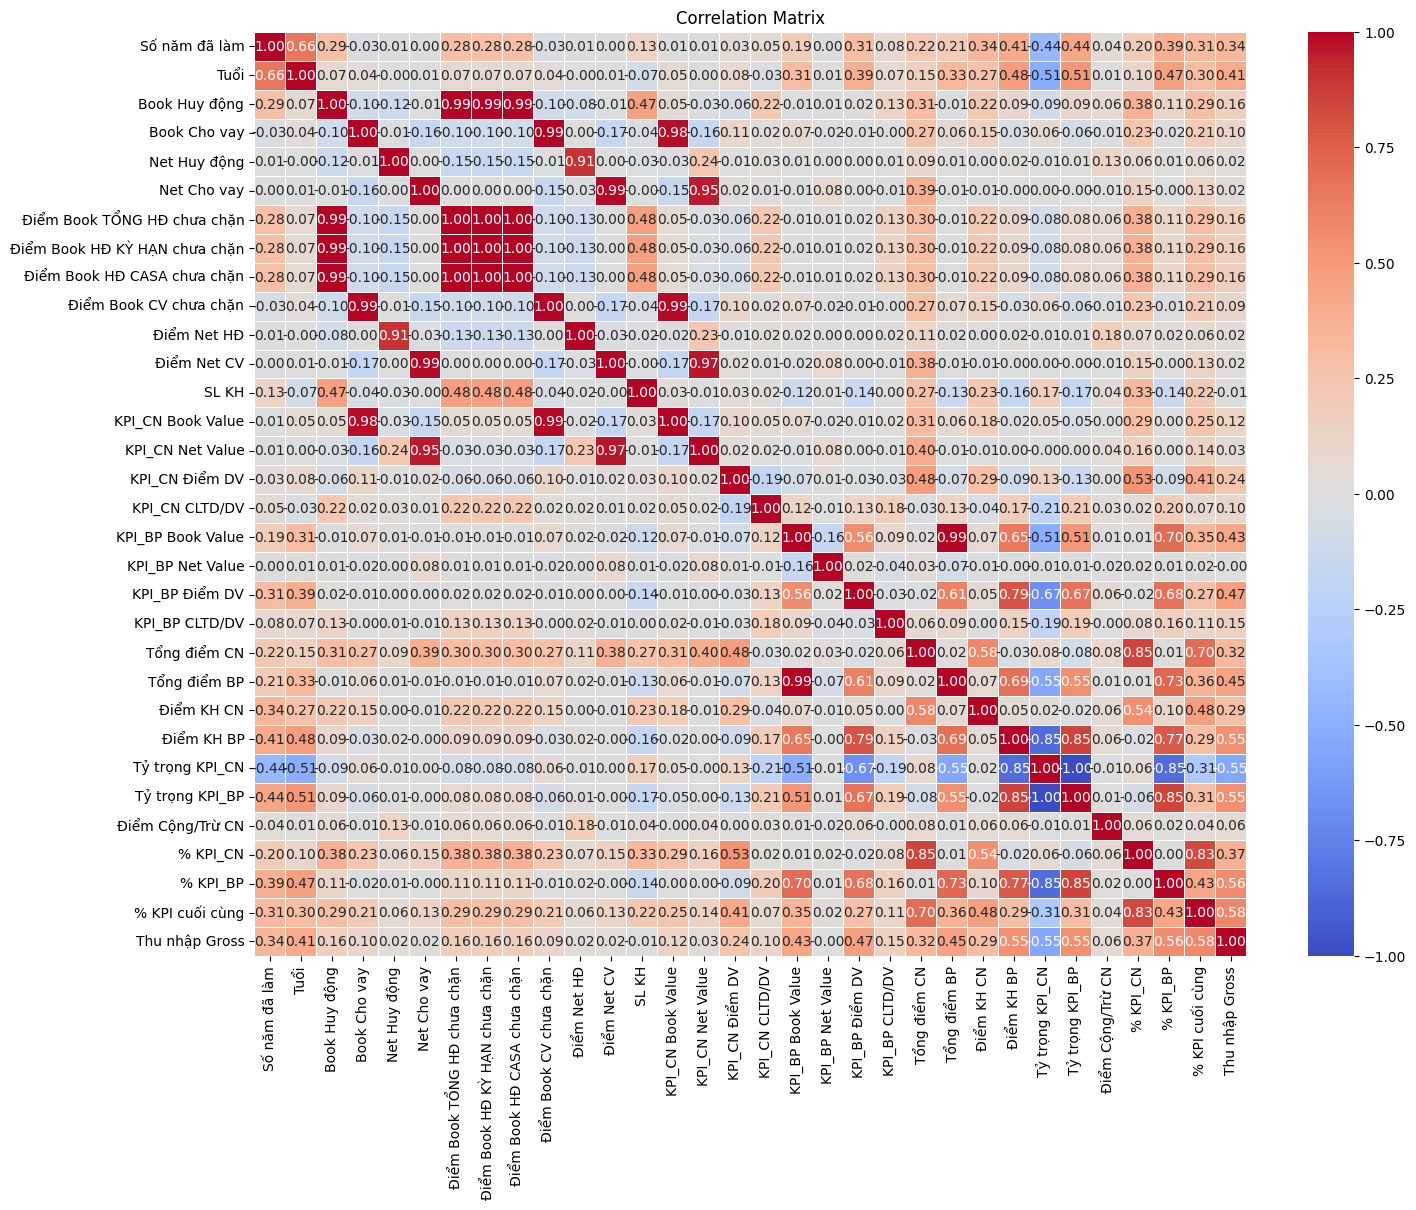

In [13]:
# Ma trận tương quan ban đầu
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Xóa các biến tương quan quá cao > 0.9
df.drop(columns=['Điểm Book TỔNG HĐ chưa chặn', 'Điểm Book HĐ KỲ HẠN chưa chặn', 'Điểm Book HĐ CASA chưa chặn', 
                 'Điểm Book CV chưa chặn',             
                 'Điểm Net HĐ',                         
                 'Điểm Net CV',                        
                 'KPI_CN Book Value',                   
                 'KPI_CN Net Value',   # Giữ lại 4 cột gốc 'Book Huy động', 'Book cho vay', ' Net Huy động', 'Net Cho vay'
                 'Tỷ trọng KPI_BP'     # Giữ lại 1 cột gốc 'Tỷ trọng KPI_CN'
                ], inplace=True)

# Xóa các biến dư thừa (tương quan 0.5-0.7 với nhiều biến cùng lúc - các biến gốc bị mất đi ý nghĩa)
df.drop(columns=['Tổng điểm CN', 'Tổng điểm BP', 
                 '% KPI_CN', '% KPI_BP', 
                 'Thu nhập Gross'
                ], inplace=True)

# Xóa biến thiếu ý nghĩa - khoảng 90% giá trị = 0
df.drop(columns=['Điểm Cộng/Trừ CN'], inplace=True)

---
## **1.1111111111: KIỂM TRA TOÀN BỘ**
- **MA TRẬN TƯƠNG QUAN**
- **PHÂN PHỐI**
- **THỐNG KÊ MÔ TẢ**

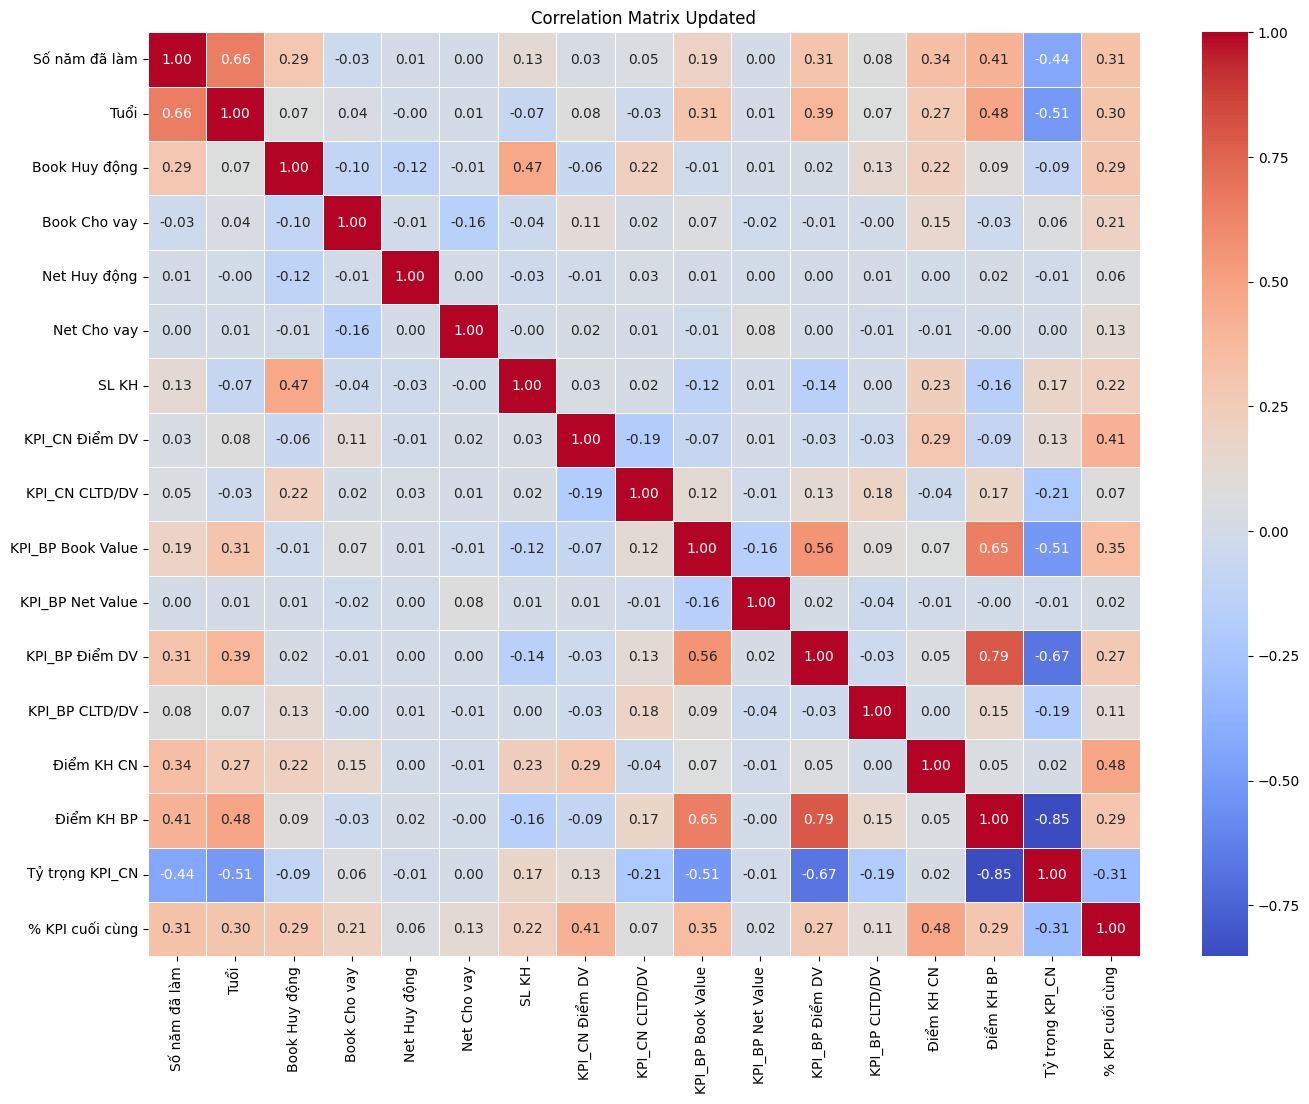

In [15]:
# Ma trận tương quan 2
df_numeric_2 = df.select_dtypes(include=[np.number])
corr_matrix_2 = df_numeric_2.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Updated')
plt.show()

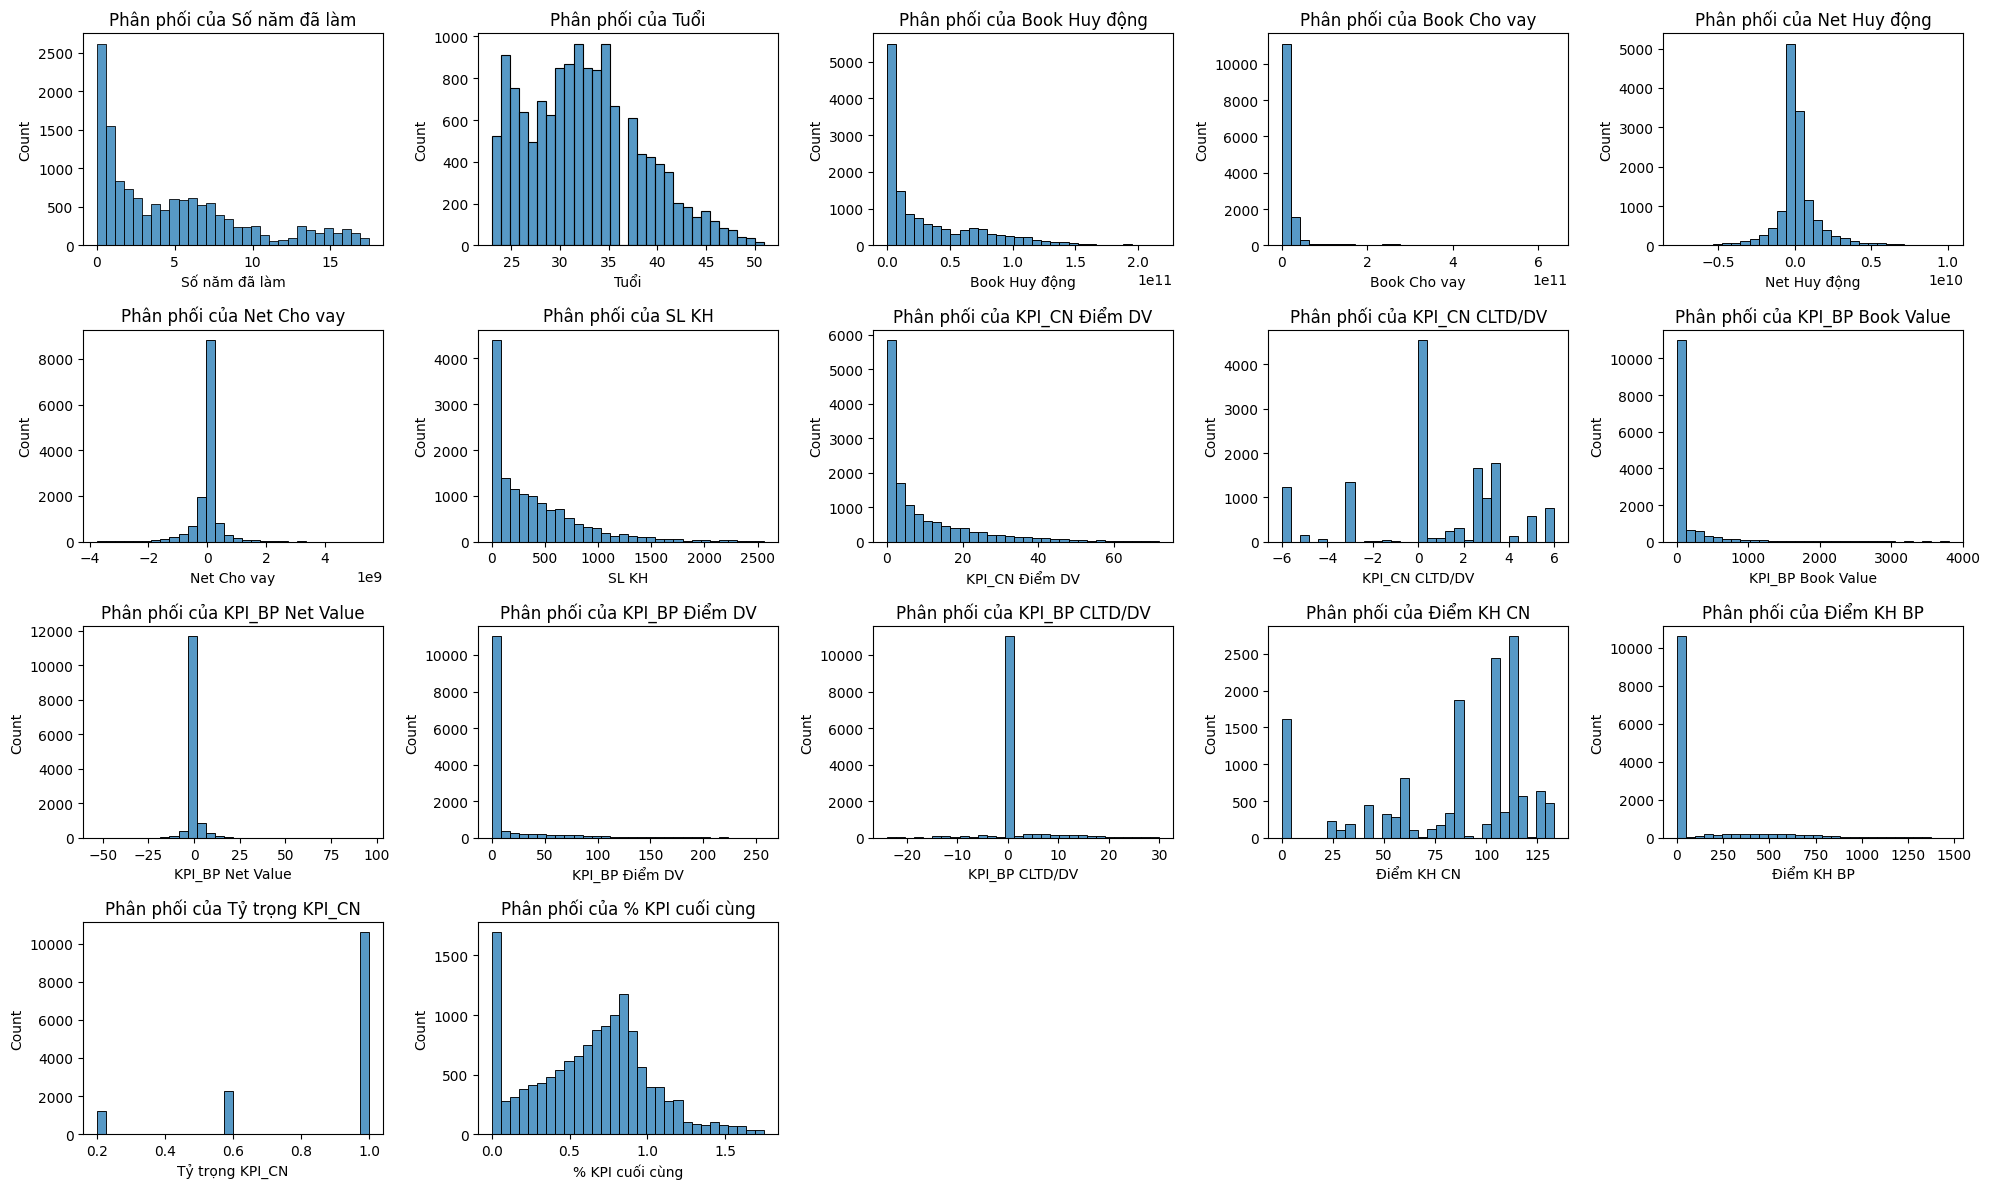

In [16]:
# Phân phối 
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features = len(numerical_features)
cols = 5
rows = math.ceil(num_features / cols)
plt.figure(figsize=(cols * 4, rows * 3))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    
    data_plt = df[feature]                           # Tạo data_plt cắt đi phần ngoại lai trên dưới cho đồ thị mượt dễ hình dung hơn
    q_low = data_plt.quantile(0.01)
    q_high = data_plt.quantile(0.99)
    data_plt = data_plt[(data_plt >= q_low) & (data_plt <= q_high)]
    
    sns.histplot(data_plt, bins=30)
    plt.title(f'Phân phối của {feature}')
    plt.tight_layout()
plt.show()

In [17]:
# Kiểm tra 1: Số quan sát, Định dạng
display(df.info())
print("")

# Kiểm tra 2: Thống kê mô tả
display(df.describe(include=['object', 'category']))
print("")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Mã ĐVKD            14074 non-null  category
 1   Mã chức danh       14074 non-null  category
 2   Số năm đã làm      14074 non-null  float64 
 3   Giới tính          14074 non-null  category
 4   Tuổi               14074 non-null  int64   
 5   Book Huy động      14074 non-null  float64 
 6   Book Cho vay       14074 non-null  float64 
 7   Net Huy động       14074 non-null  float64 
 8   Net Cho vay        14074 non-null  float64 
 9   SL KH              14074 non-null  int64   
 10  KPI_CN Điểm DV     14074 non-null  float64 
 11  KPI_CN CLTD/DV     14074 non-null  float64 
 12  KPI_BP Book Value  14074 non-null  float64 
 13  KPI_BP Net Value   14074 non-null  float64 
 14  KPI_BP Điểm DV     14074 non-null  float64 
 15  KPI_BP CLTD/DV     14074 non-null  float64 
 16  Điểm

None

,Mã ĐVKD,Mã chức danh,Giới tính
count,14074,14074,14074
unique,134,6,2
top,34,QLKH,Nữ
freq,358,5713,8345


,Số năm đã làm,Tuổi,Book Huy động,Book Cho vay,Net Huy động,Net Cho vay,SL KH,KPI_CN Điểm DV,KPI_CN CLTD/DV,KPI_BP Book Value,KPI_BP Net Value,KPI_BP Điểm DV,KPI_BP CLTD/DV,Điểm KH CN,Điểm KH BP,Tỷ trọng KPI_CN,% KPI cuối cùng
count,"14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00","14,074.00"
mean,5.07,32.66,"36,672,385,062.04","35,358,591,174.61","160,594,136.57","137,740,886.82",420.85,10.35,0.70,217.19,0.34,19.31,0.84,83.09,149.04,0.87,0.64
std,4.92,6.49,"51,610,839,087.12","142,051,984,062.98","8,604,355,671.19","18,889,213,026.29",533.46,15.96,3.18,751.75,67.07,52.75,8.19,38.88,322.59,0.25,0.40
min,0.00,22.00,0.00,0.00,"-301,205,716,838.33","-503,574,637,116.45",0.00,-8.22,-17.50,0.00,"-1,244.01",-5.42,-146.00,0.00,0.00,0.20,0.00
25%,0.83,28.00,"2,092,097,352.25","78,234,797.47","-183,317,197.84","-53,840,753.21",47.00,0.70,0.00,0.00,0.00,0.00,0.00,58.33,0.00,1.00,0.35
50%,3.83,32.00,"14,753,220,314.03","754,756,816.95","11,220,830.10",0.00,263.00,3.89,0.00,0.00,0.00,0.00,0.00,104.17,0.00,1.00,0.68
75%,7.50,36.00,"59,133,965,960.00","17,171,241,643.88","532,529,652.68","50,977,820.31",603.00,14.05,3.00,0.00,0.00,0.00,0.00,112.55,0.00,1.00,0.88
max,27.33,62.00,"731,701,391,170.00","2,841,762,198,150.10","327,166,010,360.74","420,499,746,532.55","6,184.00",473.27,6.00,"12,223.29","1,302.61",599.74,65.00,133.33,"2,911.11",1.00,2.00


---
# <div align="center">**2. MÔ HÌNH DỰ BÁO % KPI**</div>   
---

## **2.1: CHIA DỮ LIỆU**
- **PIPELINE SPLIT VS SCALE**
    - Cần chia dữ liệu trước khi chuẩn hóa về 1 thang đó; tránh hiện tượng data leakage: tập test học được quy luật từ tập train
- **TỈ LỆ CHIA DỮ LIỆU**
    - Thử nghiệm thay đổi tỉ lệ xem kết quả mô hình ở dưới có thay đổi nhiều không

    > test_size = 0.2

In [18]:
# Biến x là các biến đầu vào, y là đầu ra cần dự đoán
x = df.drop(['% KPI cuối cùng'], axis=1)   
y = df['% KPI cuối cùng'] 

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42               
)

# Kiểm tra kích thước tập train/test
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (11259, 19)
Test size: (2815, 19)


---
## **2.2: CHUẨN HÓA DỮ LIỆU**
- **CHUẨN HÓA CHO MÔ HÌNH SAU NÀY**
    - Ta tạo bản copy và chuẩn hóa trên đó X_train_scaled để sau này dễ gọi thử nghiệm, tránh ghi đè X_train gốc
- **BIẾN ĐỊNH LƯỢNG**
    - Chuyển hết về 1 thang đo chung bằng Scaler
    - Việc sử dụng phương pháp Scale nào (Standard/MinMax/Robust/etc...) tùy vào đặc điểm các biến 
    - Nếu chưa biết mà muốn tìm hiểu thuật toán: hỏi ChatGPT
    - Nếu không hiểu hoặc không muốn tìm hiểu thuật toán thì cứ thử nghiệm từng Scaler đã được chú thích trong Code 
- **BIẾN ĐỊNH DANH**
    - Tương tự, việc sử dụng phương pháp Encoder nào (OneHot/Label/Target/etc...) tùy vào đặc điểm từng biến
    - Tương tự, hỏi ChatGPT
- **CHUẨN HÓA TẬP TEST THEO TẬP TRAIN**
    - Dùng đúng scaler đã FIT ở tập X_train - TRANSFORM lên tập X_test
    - LƯU Ý: khi chạy các bước huấn luyện mô hình và so sánh kết quả ở phía sau cần gọi đúng cặp đã chuấn hóa/không chuẩn hóa
- **CỘT TARGET Y**
    - Trong dự án này, Y là '% KPI cuối cùng' đã được phân phối rất đẹp từ 0 đến 2, không cần chuẩn hóa
- **LƯU Ý CUỐI CÙNG**
    - Với biến định danh, định tính phân loại: tất cả các mô hình đều cần chuẩn hóa
    - Với biến định lượng: trong quá trình thử nghiệm ở phía sau, nhận thấy chỉ có 3 mô hình Linear SVR KNN bị ảnh hưởng thậm tệ nếu không chuẩn hóa; còn các mô hình cây thì độ chính xác gần như không đổi
    - Vậy nên ta cứ chuẩn hóa cho cả 5 mô hình, dễ sử dụng vòng lặp cho các bước in bảng đánh giá và trực quan

In [19]:
# Sao chép dữ liệu gốc để xử lý riêng
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# BIẾN ĐỊNH DANH, ĐỊNH TÍNH
# One-hot cho giới tính nhị phân
X_train_scaled = pd.get_dummies(X_train_scaled, columns=['Giới tính'], drop_first=True)
X_test_scaled = pd.get_dummies(X_test_scaled, columns=['Giới tính'], drop_first=True)

# Target encoding cho các biến phân loại nhiều giá trị
encoder = TargetEncoder()
X_train_scaled[['Mã ĐVKD', 'Mã chức danh']] = encoder.fit_transform(
    X_train_scaled[['Mã ĐVKD', 'Mã chức danh']], y_train
)
X_test_scaled[['Mã ĐVKD', 'Mã chức danh']] = encoder.transform(
    X_test_scaled[['Mã ĐVKD', 'Mã chức danh']]
)

# # BIẾN ĐỊNH LƯỢNG
# numerical_cols = X_train_scaled.select_dtypes(include=[np.number]).columns.tolist()

# scaler = StandardScaler()
# X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
# X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Kiểm tra
display(X_train_scaled.head(5))
print("")
display(X_train_scaled.describe())

,Mã ĐVKD,Mã chức danh,Số năm đã làm,Tuổi,Book Huy động,Book Cho vay,Net Huy động,Net Cho vay,SL KH,KPI_CN Điểm DV,KPI_CN CLTD/DV,KPI_BP Book Value,KPI_BP Net Value,KPI_BP Điểm DV,KPI_BP CLTD/DV,Điểm KH CN,Điểm KH BP,Tỷ trọng KPI_CN,Giới tính_Nữ
6601,0.62,0.54,7.17,30,"92,476,359,195.00","466,041,829.50","-1,060,589,163.97","105,046,032.17",1288,3.83,2.50,0.00,0.00,0.00,0.00,104.17,0.00,1.00,True
7053,0.67,0.54,1.00,24,"12,948,406,065.00","3,084,171.00","-671,929,911.35","32,810,890.90",250,3.00,2.50,0.00,0.00,0.00,0.00,87.50,0.00,1.00,True
1897,0.62,0.53,6.83,31,"76,245,211,306.40","295,877,916.00","-2,238,243,295.60","20,803,006.78",503,4.25,3.50,0.00,0.00,0.00,0.00,104.17,0.00,1.00,True
12629,0.58,0.54,1.50,24,"33,130,106,265.00","7,548,090.90","780,252,977.55","-81,222.51",564,2.00,3.50,0.00,0.00,0.00,0.00,87.50,0.00,1.00,True
12686,0.66,0.54,9.92,33,"133,805,119,301.00","524,563,709.70","2,013,152,630.35","16,489,684.05",299,0.90,3.50,0.00,0.00,0.00,0.00,104.17,0.00,1.00,True


,Mã ĐVKD,Mã chức danh,Số năm đã làm,Tuổi,Book Huy động,Book Cho vay,Net Huy động,Net Cho vay,SL KH,KPI_CN Điểm DV,KPI_CN CLTD/DV,KPI_BP Book Value,KPI_BP Net Value,KPI_BP Điểm DV,KPI_BP CLTD/DV,Điểm KH CN,Điểm KH BP,Tỷ trọng KPI_CN
count,"11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00","11,259.00"
mean,0.64,0.64,5.06,32.67,"36,188,470,526.13","35,407,903,016.73","166,607,858.87","210,414,650.42",419.07,10.38,0.71,218.14,0.05,19.32,0.84,83.32,149.40,0.87
std,0.13,0.13,4.93,6.50,"50,475,190,494.47","143,780,371,537.93","9,104,385,767.39","19,064,130,657.10",537.26,16.17,3.18,747.69,67.70,52.75,8.28,38.78,323.68,0.25
min,0.27,0.53,0.00,22.00,0.00,0.00,"-301,205,716,838.33","-503,574,637,116.45",0.00,-8.22,-17.50,0.00,"-1,244.01",-5.42,-146.00,0.00,0.00,0.20
25%,0.56,0.54,0.83,28.00,"2,057,689,294.00","79,507,868.55","-179,999,539.65","-53,725,930.87",45.00,0.69,0.00,0.00,0.00,0.00,0.00,58.33,0.00,1.00
50%,0.65,0.61,3.75,32.00,"14,669,708,547.00","763,500,000.00","12,185,941.16",0.00,261.00,3.83,0.00,0.00,0.00,0.00,0.00,104.17,0.00,1.00
75%,0.71,0.62,7.50,36.00,"58,493,633,942.00","17,269,181,787.00","531,436,653.52","51,332,153.70",599.50,14.08,3.00,0.00,0.00,0.00,0.00,112.55,0.00,1.00
max,1.00,1.00,27.33,62.00,"731,701,391,170.00","2,841,762,198,150.10","327,166,010,360.74","420,499,746,532.55","6,184.00",473.27,6.00,"12,223.29","1,302.61",599.74,65.00,133.33,"2,911.11",1.00


---
## **2.3: HUẤN LUYỆN MÔ HÌNH**
- **LỰA CHỌN MÔ HÌNH VÀ THỬ NGHIỆM**
    - Trong quá trình cải thiện mô hình, tên các mô hình ở dưới cũng có thể bị thay thế

    >**=> Lưu trữ lại tên các mô hình trong 1 dictionary - dùng vòng lặp nhanh hơn trong các bước sau: In kết quả, Trực quan hóa, v.v**

In [20]:
# Thiết lập thông số từng mô hình
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_reg = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Huấn luyện các mô hình trên tập train
lin_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train_scaled, y_train)
xgb_reg.fit(X_train_scaled, y_train)
svr_reg.fit(X_train_scaled, y_train)
knn_reg.fit(X_train_scaled, y_train)

# Lưu trữ các mô hình vào dictionary để tiện vòng lặp đánh giá sau này
trained_models = {
    'Linear Regression': lin_reg,
    'Random Forest Regressor': rf_reg,
    'XGBoost Regressor': xgb_reg,
    'SVR Regressor': svr_reg,
    'KNN Regressor': knn_reg
}

---
# <div align="center">**3. ĐÁNH GIÁ - NHẬN ĐỊNH**</div>   
---

## **3.1: TRỰC QUAN KẾT QUẢ**
- **SỐ LIỆU DỰ ĐOÁN SO SÁNH VỚI THỰC TẾ QUÁ KHỨ**
    - Tạo dataframe gồm cột y_test và y_pred của các mô hình tương ứng
- **BIỂU ĐỒ PHÂN PHỐI**
    - Vẽ biểu đồ phân phối cho từng mô hình

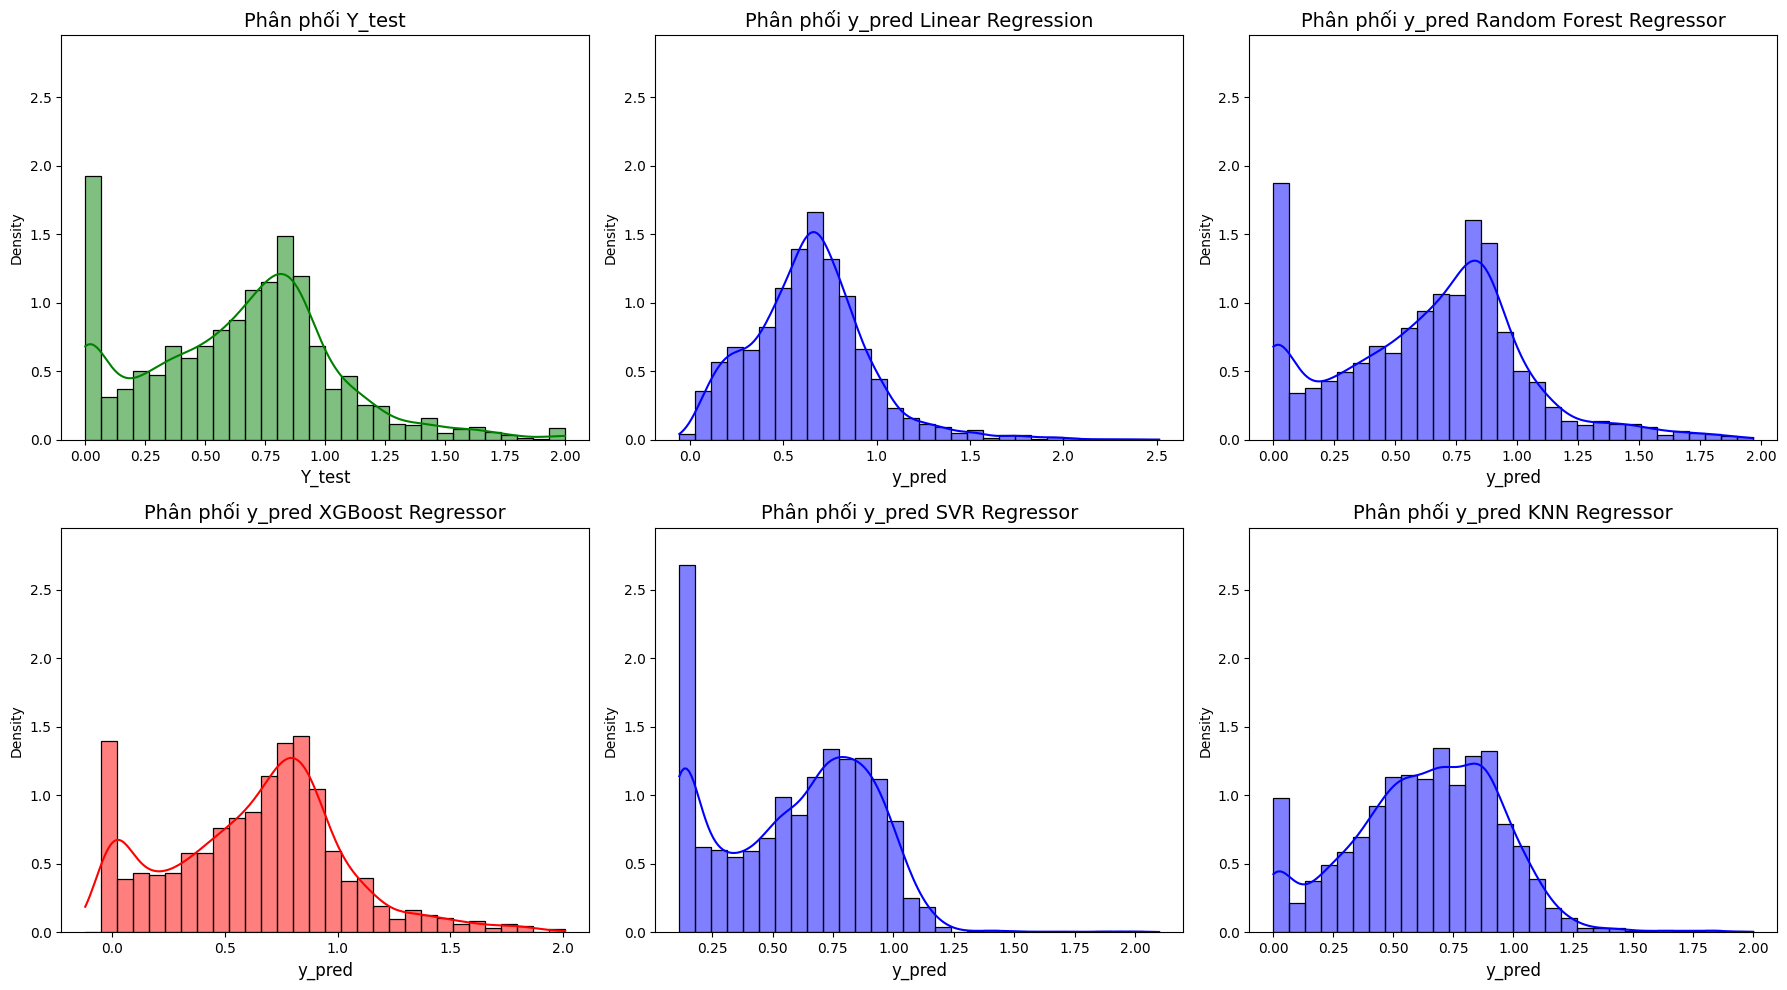

In [21]:
# Tạo DataFrame kết quả
final_results_df = pd.DataFrame({'Y_test': y_test})

# Dự đoán và lưu vào DataFrame
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    final_results_df[model_name] = y_pred

# Khởi tạo figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Lưu trữ các giá trị density để lấy y-limit lớn nhất
y_max_list = []

# Vẽ Y_test trước
plot = sns.histplot(final_results_df['Y_test'], kde=True, bins=30, color='green', stat='density', ax=axes[0])
axes[0].set_title('Phân phối Y_test', fontsize=14)
axes[0].set_xlabel('Y_test', fontsize=12)

# Lấy y cao nhất của Y_test
y_values = [patch.get_height() for patch in axes[0].patches]
y_max_list.append(max(y_values) if y_values else 0)

# Vẽ các y_pred và lưu max_height
for idx, (model_name, _) in enumerate(trained_models.items(), start=1):
    if 'xgboost' in model_name.lower():
        color = 'red'
    else:
        color = 'blue'  # xanh biển
    plot = sns.histplot(final_results_df[model_name], kde=True, bins=30, color=color, stat='density', ax=axes[idx])
    axes[idx].set_title(f'Phân phối y_pred {model_name}', fontsize=14)
    axes[idx].set_xlabel('y_pred', fontsize=12)

    y_values = [patch.get_height() for patch in axes[idx].patches]
    y_max_list.append(max(y_values) if y_values else 0)

# Xác định y_limit chung
max_ylim = max(y_max_list) * 1.1  # tăng thêm 10% cho thoáng

# Đặt y-limit cho toàn bộ axes
for ax in axes:
    ax.set_ylim(0, max_ylim)

plt.tight_layout()
plt.show()

In [22]:
# Hiển thị DataFrame với cột: 'y_test' và cột 'y_pred' từ các mô hình
display(final_results_df.head(20))  

,Y_test,Linear Regression,Random Forest Regressor,XGBoost Regressor,SVR Regressor,KNN Regressor
1393,0.37,0.68,0.60,0.49,0.76,0.68
168,0.39,0.48,0.45,0.46,0.38,0.48
13152,0.49,0.48,0.51,0.49,0.74,0.65
8313,1.79,1.70,1.76,1.76,1.71,1.68
4914,0.83,0.65,0.86,0.86,0.82,0.81
2459,0.03,0.40,0.06,0.06,0.12,0.37
7021,0.47,0.54,0.45,0.43,0.68,0.58
2128,0.69,0.72,0.69,0.67,0.75,0.77
13546,0.79,0.89,0.82,0.85,0.85,0.86
11205,0.85,0.78,0.87,0.86,0.95,0.93


---
## **3.2: CHỈ SỐ ĐÁNH GIÁ MÔ HÌNH**
- **MAE (Mean Absolute Error):**
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \Bigl|\;y_{\text{test},i} \;-\; y_{\text{pred},i}\Bigr|$$
- **RMSE (Root Mean Squared Error):**
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \bigl(y_{\text{test},i} - y_{\text{pred},i}\bigr)^2}$$
- **R-Squared (Coefficient of Determination):**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} \bigl(y_{\text{test},i} - y_{\text{pred},i}\bigr)^2}{\sum_{i=1}^{n} \bigl(y_{\text{test},i} -   \overline{y}_{\text{test}}\bigr)^2}$$

In [23]:
# Tạo bảng lưu trữ để so sánh các chỉ số MAE, RMSE, R² giữa các mô hình
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'R-Squared'])

# Vòng lặp để tính cho mọi mô hình cùng 1 lúc
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)

    # Tính MAE, RMSE, R-Squared
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Lưu trữ các chỉ số vào bảng
    metrics_df.loc[len(metrics_df)] = {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R-Squared': r_squared
    }

# Hiển thị bảng so sánh các chỉ số
print("\n========= BẢNG CHỈ SỐ ĐÁNH GIÁ MÔ HÌNH =========")
display(metrics_df)


========= BẢNG CHỈ SỐ ĐÁNH GIÁ MÔ HÌNH =========


,Model,MAE,RMSE,R-Squared
0,Linear Regression,0.19,0.24,0.64
1,Random Forest Regressor,0.04,0.08,0.96
2,XGBoost Regressor,0.04,0.08,0.96
3,SVR Regressor,0.20,0.32,0.38
4,KNN Regressor,0.20,0.30,0.44


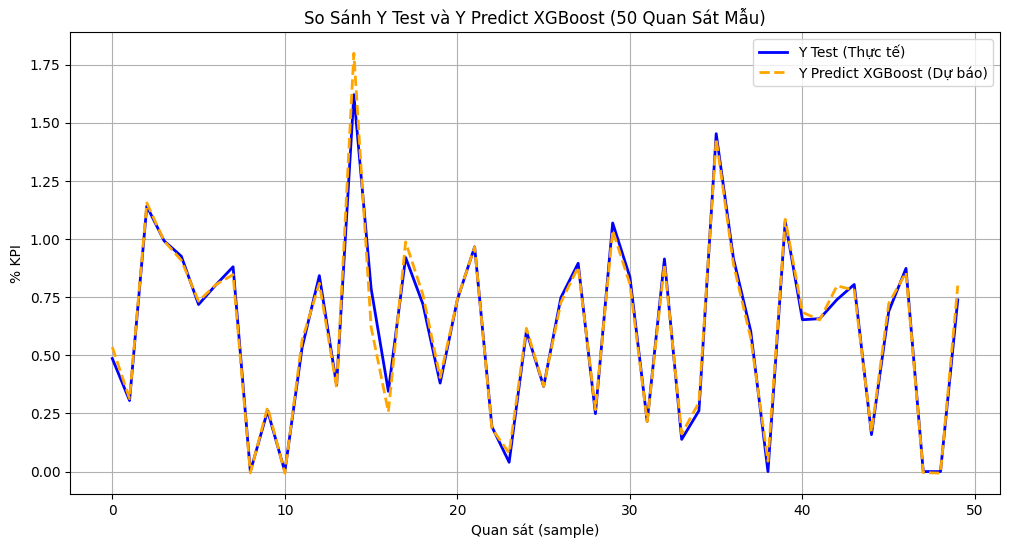

In [24]:
y_pred_xgb = xgb_reg.predict(X_test_scaled)
# Nếu y_test là Pandas Series, chuyển sang numpy array
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_array = y_pred_xgb  # Đã là numpy array rồi nên giữ nguyên

# Lấy kích thước dữ liệu gốc
sample_size = 50
np.random.seed(42)

# Lấy index theo vị trí (integer index)
sample_indices = np.random.choice(len(y_test_array), size=sample_size, replace=False)

# Lấy dữ liệu sample bằng index
y_test_sample = y_test_array[sample_indices]
y_pred_sample = y_pred_array[sample_indices]

# Sắp xếp lại chỉ số để vẽ line chart mượt mà
sorted_indices = np.argsort(sample_indices)
y_test_sample = y_test_sample[sorted_indices]
y_pred_sample = y_pred_sample[sorted_indices]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample, label='Y Test (Thực tế)', linewidth=2, color='blue')
plt.plot(y_pred_sample, label='Y Predict XGBoost (Dự báo)', linewidth=2, linestyle='--', color='orange')
plt.xlabel('Quan sát (sample)')
plt.ylabel('% KPI')
plt.title('So Sánh Y Test và Y Predict XGBoost (50 Quan Sát Mẫu)')
plt.legend()
plt.grid(True)
plt.show()

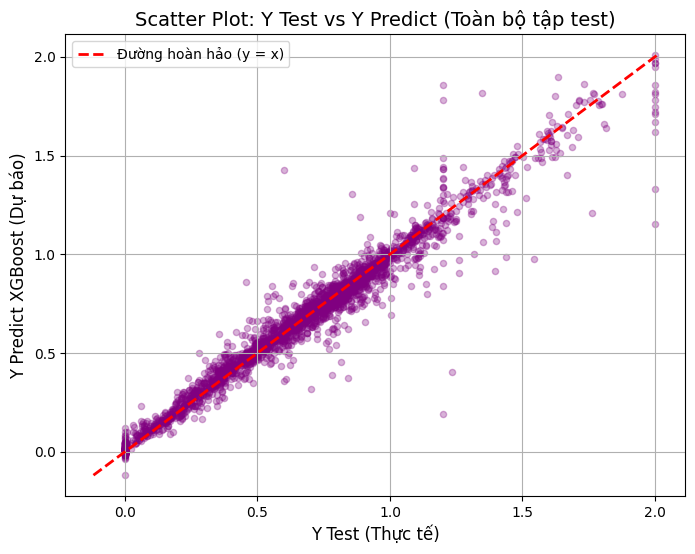

In [25]:
# Dự đoán toàn bộ tập test
y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Nếu y_test là Pandas Series, chuyển sang numpy array
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_array = y_pred_xgb  # Giữ nguyên vì đã là numpy array

# Vẽ scatter plot toàn bộ dữ liệu (2800 điểm)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_array, y_pred_array, 
            alpha=0.3,      # Độ mờ, giảm chồng lấn
            s=20,           # Kích thước điểm nhỏ cho đẹp
            color='purple') # Màu sắc tùy chọn

# Đường chéo lý tưởng (dự đoán khớp 100%)
min_val = min(y_test_array.min(), y_pred_array.min())
max_val = max(y_test_array.max(), y_pred_array.max())
plt.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label='Đường hoàn hảo (y = x)')

plt.xlabel('Y Test (Thực tế)', fontsize=12)
plt.ylabel('Y Predict XGBoost (Dự báo)', fontsize=12)
plt.title('Scatter Plot: Y Test vs Y Predict (Toàn bộ tập test)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


---
## **3.3: ĐẶC TRƯNG QUAN TRỌNG**
- **CÁC YẾU TỐ ẢNH HƯỞNG NHIỀU TỚI % KPI CUỐI CÙNG NHẤT**
    - Dùng .feature_importances_ để kiểm tra những top những biến quan trọng, ảnh hưởng lớn trong quá trình mô hình 'ánh xạ' ra biến mục tiêu '% KPI cuối cùng'
        - Đưa ra được nhận định thực trạng
        - Kiểm tra đa cộng tuyến để về bước 'Lựa chọn biến trong mô hình' 

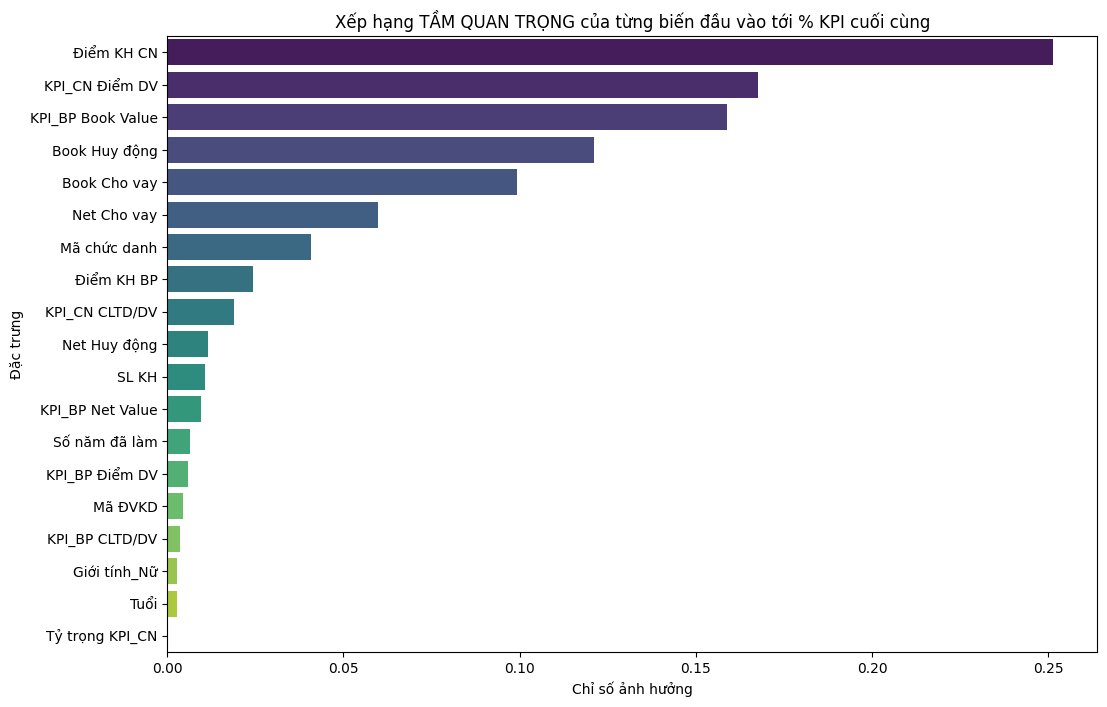

In [26]:
# Trích xuất feature importances
importances = xgb_reg.feature_importances_
feature_names = X_train_scaled.columns

# Tạo DataFrame, sắp xếp giảm dần theo Importance
feature_importances = (pd.DataFrame({
    'Đặc trưng': feature_names,
    'Độ quan trọng': importances
}).sort_values(by='Độ quan trọng', ascending=False)
)

# Vẽ biểu đồ top 20 biến quan trọng (DF3)
plt.figure(figsize=(12,8))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importances.head(20), hue='Đặc trưng', palette='viridis')
plt.title('Xếp hạng TẦM QUAN TRỌNG của từng biến đầu vào tới % KPI cuối cùng')
plt.xlabel('Chỉ số ảnh hưởng')
plt.ylabel('Đặc trưng')
plt.show()

---
# <div align="center">**KẾT LUẬN - NHẬN ĐỊNH**</div>   
---

### **1. CHỈ SỐ ĐÁNH GIÁ MÔ HÌNH**
- Hiện tại 2 mô hình có hiệu suất tốt nhất là RandomForst và XGBoost, với 20 đặc trưng cố định như trên: đạt được MAE ≈ 0.04 và R-square ≈ 0.96
- Tuy nhiên, mô hình vẫn có thể cải thiện để đạt độ chính xác cao hơn (97% - 98%) thông qua:
    - Lựa chọn, tinh chỉnh tập biến đầu vào 
    - Chuẩn hóa dữ liệu 
    - Thử nghiệm thêm mô hình 
    - Tối ưu tham số mô hình

    > **Mô hình hiện tại đặt độ chính xác 96% và vẫn có khả năng cải thiện**

    <br/>
### **2. VẤN ĐỀ LỰA CHỌN BIẾN ĐẦU VÀO CHO MÔ HÌNH**
- Một số mô hình có hiệu suất quá cao đến mức bất hợp lí, cần kiểm tra lại quá trình xây dựng, đặc biệt là bước lựa chọn biến đầu vào
- Ví dụ: Các biến như "Tổng điểm CN" hay "% KPI_CN" bắt buộc phải loại bỏ vì chúng được tính toán từ các biến gốc như "Book Huy Động", "Book Cho vay"
    - Nếu giữ lại, mô hình sẽ bỏ qua các biến gốc, dẫn đến dự báo thiếu chính xác
    - Ngoài ra, trong thực tế, khi nhập dữ liệu mới để dự báo, các biến này chưa được tạo ra, do đó mô hình không thể sử dụng chúng

    > **Cần đảm bảo chỉ sử dụng các biến độc lập nguyên gốc để tránh sai lệch kết quả.**

    <br/>
### **3. ỨNG DỤNG TRONG THỰC TẾ**
- Hiện tại, nghiên cứu mới dừng ở việc lựa chọn mô hình dự báo tốt nhất
- Bước tiếp theo là phối hợp với các bộ phận khác để tích hợp mô hình với hệ thống ngân hàng, bao gồm:
    - Thiệt kế giao diện người dùng
    - Tự động hóa quy trình nhập/xuất dữ liệu
    - Đảm bảo người dùng nhập đúng định dạng dữ liệu (số liệu, ngày tháng, chuỗi ký tự, v.v.)

    > **Khi hoàn thành, ngân hàng chỉ cần nhập đúng các biến X theo yêu cầu mô hình để dự báo KPI của từng nhân viên**

    <br/>

# <div align="center"> ==== MỞ RỘNG DỰ ÁN ====</div>       
### **4.1. DỰ BÁO THEO NGÀY TÍCH LŨY**
- Mô hình có thể dự báo tiến độ KPI theo từng ngày dựa trên tổng dữ liệu được ghi nhận
- Ví dụ: 
    - Ngày 1: "Book Huy Động" đạt 1 tỷ → % KPI ≈ 3%
    - Ngày 2: "Book Huy Động" thêm 4 tỷ → Tổng tích lũy 5 tỷ → % KPI ≈ 3.5%

    > **Giúp nhân viên và quản lý theo dõi tiến độ KPI theo thời gian thực.**

    <br/>
### **4.2. DỰ BÁO THEO CHỨC DANH/TỶ TRỌNG KPI**
- Hiện tại, mô hình bị ảnh hưởng mạnh bởi biến "Điểm KH CN", do dữ liệu mất cân bằng:
    - 70% quan sát đến từ nhóm GDV & QLKH với tỷ trọng CN-BP là 1 - 0
    - Khiến cho các nhóm có tỷ trọng CN-BP khác (0.2 - 0.8 hay 0.6 - 0.4) bị dự báo kém chính xác
- Giải pháp:
    - Chia tập dữ liệu thành 3 nhóm nhỏ tương ứng với các tỷ trọng KPI khác nhau (1 - 0, 0.6 - 0.4, 0.2 - 0.8)
    - Dự báo riêng cho từng nhóm 
      
    > **Dự báo KPI công bằng và chính xác hơn từng nhóm chức vụ**

    <br/>
### **4.3. XẾP HẠNG NHÂN VIÊN LINH HOẠT THEO THÁNG**
- Sau khi dự báo % KPI, có thể xếp hạng nhân viên theo 5 cấp độ: **Kém - Trung bình - Tốt - Rất Tốt - Xuất sắc**
- Tuy nhiên, việc xếp hạng cần phải linh hoạt theo **Quỹ lương & Chính sách** từng ngân hàng, từng tháng
- Giải pháp: "Phân cụm mềm"
    - Chạy vòng lặp với nhiều tham số và thay đổi số biến đầu vào để tìm ra mô hình có phân phối gần với phân phối mục tiêu nhất

    > **Xếp hạng nhân viên theo chính sách mong muốn của ngân hàng**

    <br/>
### **4.4. DỰ BÁO CHUỖI THỜI GIAN**
- Bộ dữ liệu được ghi nhận từ Tháng 4/2024 đến Tháng 12/2024 → Có thể dùng để dự báo tương lai.
- Ý tưởng: Xây dựng mô hình hồi quy chuỗi thời gian để dự báo % KPI hoặc Điểm KH CN cho Tháng 1/2025

    > **Cấp quản lý có thể sử dụng kết quả này để đưa ra chỉ tiêu & kế hoạch cho tháng tói**

    <br/>

<br>
<br>
<br>
<br>
<br>
<br>
<br>


---
# <div align="center">**CQR TESTING**</div>   
---

In [27]:
# X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
# X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Sao chép dữ liệu gốc để xử lý riêng
# X_train_processed = X_train.copy()
# X_calib_processed = X_calib.copy()
# X_test_processed = X_test.copy()

# # BIẾN ĐỊNH DANH, ĐỊNH TÍNH
# # One-hot cho giới tính nhị phân
# X_train_processed = pd.get_dummies(X_train_processed, columns=['Giới tính'], drop_first=True)
# X_calib_processed = pd.get_dummies(X_calib_processed, columns=['Giới tính'], drop_first=True)
# X_test_processed = pd.get_dummies(X_test_processed, columns=['Giới tính'], drop_first=True)

# # Target encoding cho các biến phân loại nhiều giá trị - chỉ fit trên tập train
# encoder = TargetEncoder()
# X_train_processed[['Mã ĐVKD', 'Mã chức danh']] = encoder.fit_transform(
#     X_train_processed[['Mã ĐVKD', 'Mã chức danh']], y_train
# )
# # Transform tập calibration và test với encoder đã được fit trên train
# X_calib_processed[['Mã ĐVKD', 'Mã chức danh']] = encoder.transform(
#     X_calib_processed[['Mã ĐVKD', 'Mã chức danh']]
# )
# X_test_processed[['Mã ĐVKD', 'Mã chức danh']] = encoder.transform(
#     X_test_processed[['Mã ĐVKD', 'Mã chức danh']]
# )

# # Bỏ qua phần StandardScaler vì ta đang sử dụng mô hình cây
# # Các mô hình cây không bị ảnh hưởng bởi quy mô của dữ liệu

# # Kiểm tra
# display(X_train_processed.head(5))
# display(X_calib_processed.head(5))
# display(X_test_processed.head(5))

In [28]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import randint, uniform
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split

from mapie.metrics import (regression_coverage_score,
                           regression_mean_width_score)
from mapie.regression import MapieQuantileRegressor, MapieRegressor
from mapie.subsample import Subsample

In [29]:
random_state = 42

rng = np.random.default_rng(random_state)
round_to = 3

warnings.filterwarnings("ignore")

estimator = LGBMRegressor(
    objective='quantile',
    alpha=0.5,
    random_state=random_state,
    verbose=-1
)
params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=50, high=100),
    learning_rate=uniform()
)
optim_model = RandomizedSearchCV(
    estimator,
    param_distributions=params_distributions,
    n_jobs=-1,
    n_iter=10,
    cv=KFold(n_splits=5, shuffle=True),
    random_state=random_state
)
optim_model.fit(X_train_scaled, y_train)
estimator = optim_model.best_estimator_

In [30]:
# Fit mô hình tốt nhất trên toàn bộ tập train
estimator.fit(X_train_scaled, y_train)

# Dự đoán
y_train_pred = estimator.predict(X_train_scaled)
y_test_pred = estimator.predict(X_test_scaled)

# Tính R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# In kết quả
print(f"R² trên tập train: {r2_train:.3f}")
print(f"R² trên tập test : {r2_test:.3f}")

R² trên tập train: 0.962
R² trên tập test : 0.946


In [31]:
def sort_y_values(y_test, y_pred, y_pis):
    """
    Sorting the dataset in order to make plots using the fill_between function.
    """
    indices = np.argsort(y_test)
    y_test_sorted = np.array(y_test)[indices]
    y_pred_sorted = y_pred[indices]
    y_lower_bound = y_pis[:, 0, 0][indices]
    y_upper_bound = y_pis[:, 1, 0][indices]
    return y_test_sorted, y_pred_sorted, y_lower_bound, y_upper_bound


def plot_prediction_intervals(
    title,
    axs,
    y_test_sorted,
    y_pred_sorted,
    lower_bound,
    upper_bound,
    coverage,
    width,
    num_plots_idx
):
    """
    Plot of the prediction intervals for each different conformal
    method.
    """
    axs.yaxis.set_major_formatter(FormatStrFormatter('%.0f' + "k"))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%.0f' + "k"))

    lower_bound_ = np.take(lower_bound, num_plots_idx)
    y_pred_sorted_ = np.take(y_pred_sorted, num_plots_idx)
    y_test_sorted_ = np.take(y_test_sorted, num_plots_idx)

    error = y_pred_sorted_-lower_bound_

    warning1 = y_test_sorted_ > y_pred_sorted_+error
    warning2 = y_test_sorted_ < y_pred_sorted_-error
    warnings = warning1 + warning2
    axs.errorbar(
        y_test_sorted_[~warnings],
        y_pred_sorted_[~warnings],
        yerr=np.abs(error[~warnings]),
        capsize=5, marker="o", elinewidth=2, linewidth=0,
        label="Inside prediction interval"
        )
    axs.errorbar(
        y_test_sorted_[warnings],
        y_pred_sorted_[warnings],
        yerr=np.abs(error[warnings]),
        capsize=5, marker="o", elinewidth=2, linewidth=0, color="red",
        label="Outside prediction interval"
        )
    axs.scatter(
        y_test_sorted_[warnings],
        y_test_sorted_[warnings],
        marker="*", color="green",
        label="True value"
    )
    axs.set_xlabel("True house prices in $")
    axs.set_ylabel("Prediction of house prices in $")
    ab = AnnotationBbox(
        TextArea(
            f"Coverage: {np.round(coverage, round_to)}\n"
            + f"Interval width: {np.round(width, round_to)}"
        ),
        xy=(np.min(y_test_sorted_)*3, np.max(y_pred_sorted_+error)*0.95),
        )
    lims = [
        np.min([axs.get_xlim(), axs.get_ylim()]),  # min of both axes
        np.max([axs.get_xlim(), axs.get_ylim()]),  # max of both axes
    ]
    axs.plot(lims, lims, '--', alpha=0.75, color="black", label="x=y")
    axs.add_artist(ab)
    axs.set_title(title, fontweight='bold')

In [49]:
alpha_test_for_all_model = 0.05

STRATEGIES = {
    "naive": {"method": "naive"},
    "cv_plus": {"method": "plus", "cv": 10},
    "jackknife_plus_ab": {"method": "plus", "cv": Subsample(n_resamplings=50)},
    "cqr": {"method": "quantile", "cv": "split", "alpha": alpha_test_for_all_model},
}
y_pred, y_pis = {}, {}
y_test_sorted, y_pred_sorted, lower_bound, upper_bound = {}, {}, {}, {}
coverage, width = {}, {}
for strategy, params in STRATEGIES.items():
    if strategy == "cqr":
        mapie = MapieQuantileRegressor(
            estimator, 
            **params
            )
        mapie.fit(
            X_train_scaled,
            y_train,
            calib_size=0.3,
            random_state=random_state
        )
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test_scaled)
    else:
        mapie = MapieRegressor(
            estimator,
            test_size=0.3,
            random_state=random_state,
            **params
        )
        mapie.fit(X_train_scaled, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test_scaled, alpha=alpha_test_for_all_model)
    (
        y_test_sorted[strategy],
        y_pred_sorted[strategy],
        lower_bound[strategy],
        upper_bound[strategy]
    ) = sort_y_values(y_test, y_pred[strategy], y_pis[strategy])
    coverage[strategy] = regression_coverage_score(
        y_test,
        y_pis[strategy][:, 0, 0],
        y_pis[strategy][:, 1, 0]
        )
    width[strategy] = regression_mean_width_score(
        y_pis[strategy][:, 0, 0],
        y_pis[strategy][:, 1, 0]
        )

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.


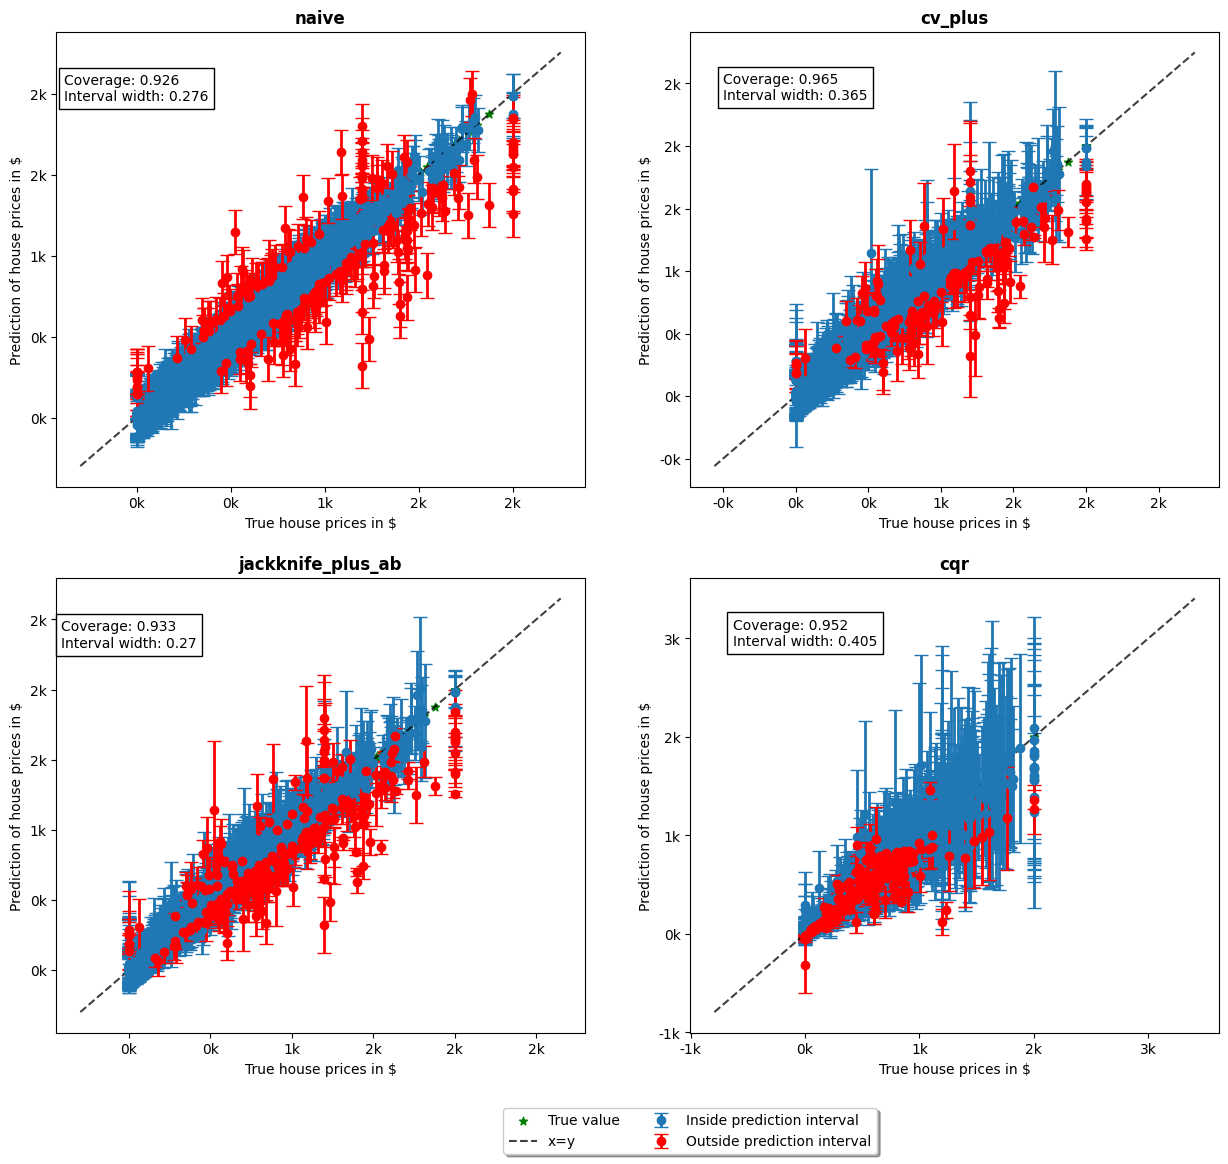

In [52]:
perc_obs_plot = 1
num_plots = rng.choice(
    len(y_test), int(perc_obs_plot*len(y_test)), replace=False
    )
fig, axs = plt.subplots(2, 2, figsize=(15, 13))
coords = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
for strategy, coord in zip(STRATEGIES.keys(), coords):
    plot_prediction_intervals(
        strategy,
        coord,
        y_test_sorted[strategy],
        y_pred_sorted[strategy],
        lower_bound[strategy],
        upper_bound[strategy],
        coverage[strategy],
        width[strategy],
        num_plots
        )
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(_, []) for _ in zip(*lines_labels)]
plt.legend(
    lines[:4], labels[:4],
    loc='upper center',
    bbox_to_anchor=(0, -0.15),
    fancybox=True,
    shadow=True,
    ncol=2
)
plt.show()

In [34]:
def get_coverages_widths_by_bins(
    want,
    y_test,
    y_pred,
    lower_bound,
    upper_bound,
    STRATEGIES,
    n_bins
):
    """
    Split test values into quantile bins and calculate coverage or width per bin.
    """
    # Tạo Series từ qcut để dùng .cat.categories
    bin_series = pd.Series(pd.qcut(y_test["naive"], q=n_bins, duplicates='drop'))
    bin_categories = bin_series.cat.categories

    # Xây danh sách các điểm cắt
    cuts = [cat.left for cat in bin_categories]
    cuts.append(bin_categories[-1].right)
    cuts.append(np.max(y_test["naive"]) + 1)

    recap = {}
    for i in range(len(cuts) - 1):
        cut1, cut2 = cuts[i], cuts[i + 1]
        name = f"[{np.round(cut1, 2)}, {np.round(cut2, 2)}]"
        recap[name] = []
        for strategy in STRATEGIES:
            indices = np.where(
                (y_test[strategy] > cut1) & (y_test[strategy] <= cut2)
            )[0]
            y_test_trunc = y_test[strategy][indices]
            y_low_ = lower_bound[strategy][indices]
            y_high_ = upper_bound[strategy][indices]
            if want == "coverage":
                recap[name].append(regression_coverage_score(
                    y_test_trunc,
                    y_low_,
                    y_high_
                ))
            elif want == "width":
                recap[name].append(
                    regression_mean_width_score(y_low_, y_high_)
                )
    recap_df = pd.DataFrame(recap, index=STRATEGIES)
    return recap_df


In [53]:
binned_data = get_coverages_widths_by_bins(
    want="coverage",
    y_test=y_test_sorted,
    y_pred=y_pred_sorted,
    lower_bound=lower_bound,
    upper_bound=upper_bound,
    STRATEGIES=STRATEGIES,
    n_bins=10
)


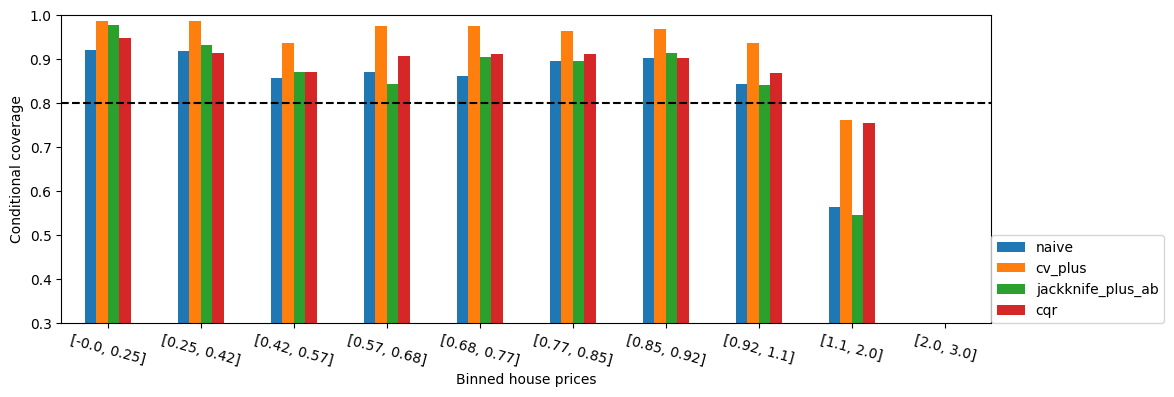

In [41]:
binned_data.T.plot.bar(figsize=(12, 4))
plt.axhline(0.8, ls="--", color="k")
plt.ylabel("Conditional coverage")
plt.xlabel("Binned house prices")
plt.xticks(rotation=345)
plt.ylim(0.3, 1.0)
plt.legend(loc=[1, 0])
plt.show()

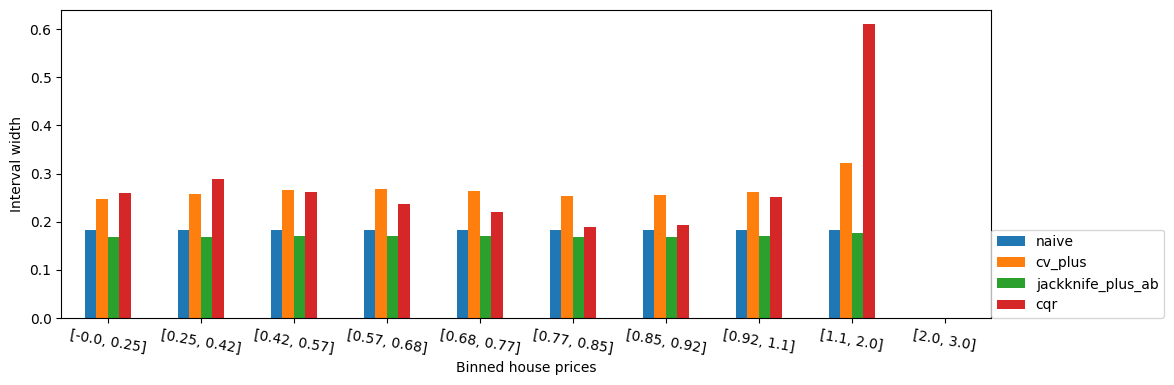

In [44]:
binned_data = get_coverages_widths_by_bins(
    "width",
    y_test_sorted,
    y_pred_sorted,
    lower_bound,
    upper_bound,
    STRATEGIES,
    n_bins=10
)


binned_data.T.plot.bar(figsize=(12, 4))
plt.ylabel("Interval width")
plt.xlabel("Binned house prices")
plt.xticks(rotation=350)
plt.legend(loc=[1, 0])
plt.show()